# DOCTOR'S CONSULTATION FEES PROJECT

NAME: VAIBHAV TAYADE

Contact: 8087970061
Email id: vaibhav_t29@rediffmail.com

# IMPORTING LIBRARIES:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# IMPORTING DATASET:

In [2]:
train_data = pd.read_excel('Final_Train.xlsx')

test_data = pd.read_excel('Final_Test.xlsx')

In [3]:
# checking head of the traindata
train_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
train_data.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


Observation: we can see that there's only one nuemerical column in the dataset i.e. our target column 'Fees'.

# Observation:

OBSERVATION: In column Qualification, most of degress are repeated with various specializations, we can extract only degree from that dataset.
    In column Experience, we have data in full text form, we need to extract only neumerical values from it.
    In column Place, data is given in suburban place and city separated by comma, we can extract suburb and city from the Place column. 

In [5]:
# dropping 'Miscellaneous_Info' column as it doesnt hold any specific values which can be processed.
dataset = [train_data, test_data]
for dt in dataset:
    dt.drop("Miscellaneous_Info",axis=1,inplace=True)

In [6]:
# Extracting number of years from 'Experience' column.
for dt in dataset:
    dt["Experience"] = dt["Experience"].str.split()
    dt["No of Years Experience"] = dt["Experience"].str[0].astype("int")

In [7]:
# extracting suburban place and City names from the Place column:

for dt in dataset:
    dt["Place"].fillna("NaN, NaN",inplace=True)
    dt["Place"] = dt["Place"].str.split(",")
    dt["City"] = dt["Place"].str[-1]
    dt["Suburb"] = dt["Place"].str[0]

In [8]:
# extracting degree from the Qualification column.
for dt in dataset:
    dt["Qualification"].fillna("NaN, NaN",inplace=True)
    dt["Qualification"] = dt["Qualification"].str.split(",")
    dt["Qualification - Degree"] = dt["Qualification"].str[0]
    

In [9]:
# extracting only degree names from the Qualification - Degree column.
for dt in dataset:
    dt["Qualification - Degree"] = dt["Qualification - Degree"].str.split("-")
    dt["Degree"] = dt["Qualification - Degree"].str[0]
    

In [10]:
# checking count of null values:
train_data.isnull().sum()

Qualification                0
Experience                   0
Rating                    3302
Place                        0
Profile                      0
Fees                         0
No of Years Experience       0
City                         0
Suburb                       0
Qualification - Degree       0
Degree                       0
dtype: int64

Observation: We can see there are null values present in Rating column.

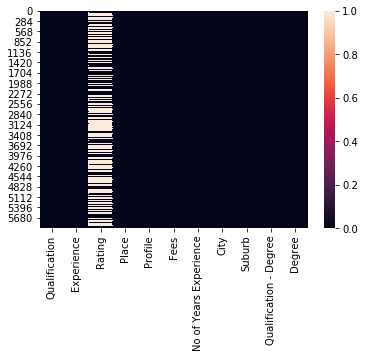

In [11]:
# checking null values in dataset
sns.heatmap(train_data.isnull())

Observation: We can see there are null values present in the 'Rating column'

In [12]:
# checking mode value of Rating column
train_data['Rating'].mode()

0    100%
dtype: object

In [13]:
# filling null values with mode values of a column i.e. '100%'.
for dt in dataset:
    dt["Rating"].fillna("100%",inplace=True)

In [14]:
# after extracting data from 'Experience', 'Qualification' and 'Qualification - Degree' column, we can delete those column.
for dt in dataset:
    dt.drop("Experience",axis=1,inplace=True)
    dt.drop("Qualification",axis=1,inplace=True)
    dt.drop("Qualification - Degree",axis=1,inplace=True)
    
    dt.drop("Place",axis=1,inplace=True)

In [15]:
# rearranging columns:
train_data = train_data[['Degree','Profile','No of Years Experience','Rating','City','Suburb','Fees']]

In [16]:
# rearranging columns:
test_data = test_data[['Degree','Profile','No of Years Experience','Rating','City','Suburb']]

In [17]:
# checking datatypes:
train_data.dtypes

Degree                    object
Profile                   object
No of Years Experience     int32
Rating                    object
City                      object
Suburb                    object
Fees                       int64
dtype: object

In [18]:
# to check whole data of the dataset:
pd.set_option("display.max_rows", None, "display.max_columns", None)


NOTE: here in our dataset, we have doctors with huge number of degrees and specialization, it very tough to sort them and encode them later with fair values, we'll choose here top 7 degrees which has highest number of datasets.

We have selected 'MBBS', 'BDS', 'BAMS', 'MD', 'MDS', 'MS degrees because it holds around 95 % of the dataset.

In [19]:
# ceating new datasets

train_data_MBBS = train_data.loc[train_data['Degree'] == 'MBBS']
train_data_BDS = train_data.loc[train_data['Degree'] == 'BDS']
train_data_BAMS = train_data.loc[train_data['Degree'] == 'BAMS']
train_data_BHMS = train_data.loc[train_data['Degree'] == 'BHMS']
train_data_MD = train_data.loc[train_data['Degree'] == 'MD']
train_data_MDS = train_data.loc[train_data['Degree'] == 'MDS']
train_data_MS = train_data.loc[train_data['Degree'] == 'MS']

test_data_MBBS = test_data.loc[test_data['Degree'] == 'MBBS']
test_data_BDS = test_data.loc[test_data['Degree'] == 'BDS']
test_data_BAMS = test_data.loc[test_data['Degree'] == 'BAMS']
test_data_BHMS = test_data.loc[test_data['Degree'] == 'BHMS']
test_data_MD = test_data.loc[test_data['Degree'] == 'MD']
test_data_MDS = test_data.loc[test_data['Degree'] == 'MDS']
test_data_MS = test_data.loc[test_data['Degree'] == 'MS']




In [20]:
# creating new train_data with only considerable degrees already mentioned above:
train_data_new = pd.concat([train_data_MBBS, train_data_BDS, train_data_BAMS, train_data_BHMS, train_data_MD, train_data_MDS, train_data_MS])

In [21]:
train_1 = train_data_new.copy()

In [22]:
# creating new test_data with only considerable degrees already mentioned above:

test_data_new = pd.concat([test_data_MBBS, test_data_BDS, test_data_BAMS, test_data_BHMS, test_data_MD, test_data_MDS, test_data_MS])

In [23]:
train_data_new['Degree'].value_counts()
# our new dataset holds only this six degrees.

MBBS    2448
BDS     1208
BAMS     711
BHMS     706
MDS       13
MD         1
Name: Degree, dtype: int64

In [24]:
# CHECKING NEW TRAINDATA:
train_data_new

,Degree,Profile,No of Years Experience,Rating,City,Suburb,Fees
2,MBBS,ENT Specialist,9,100%,Bangalore,Mathikere - BEL,300
8,MBBS,General Medicine,14,100%,Hyderabad,Old City,100
10,MBBS,ENT Specialist,5,100%,Chennai,Thousand Lights,700
14,MBBS,ENT Specialist,12,100%,Delhi,Kondli,500
15,MBBS,General Medicine,10,100%,Hyderabad,Saroor Nagar,200
16,MBBS,ENT Specialist,24,100%,Chennai,Tambaram West,100
17,MBBS,Homeopath,5,100%,Chennai,Purasawakkam,300
18,MBBS,ENT Specialist,19,79%,Hyderabad,KPHB,400
19,MBBS,General Medicine,19,100%,Bangalore,HSR Layout,150
21,MBBS,ENT Specialist,14,100%,Delhi,Vasundhra Enclave,500


# LABEL ENCODING DATASET:

In [25]:
# LABEL ENCODING THE CATEGORICAL DATASET:

dataset = [train_data_new, test_data_new]
for dt in dataset:
    LE = LabelEncoder()
    
    dt['Profile'] = LE.fit_transform(dt['Profile'])
    dt['Rating'] = LE.fit_transform(dt['Rating'])
    dt['City'] = LE.fit_transform(dt['City'])
    dt['Suburb'] = LE.fit_transform(dt['Suburb'])
    

In [26]:
train_data_new.shape

(5087, 7)

In [27]:
train_data_new.columns

Index(['Degree', 'Profile', 'No of Years Experience', 'Rating', 'City',
       'Suburb', 'Fees'],
      dtype='object')

In [28]:
# WE NEED TO ENCODE THE 'DEGREE' COLUMN MANUALLY SO THAT BOTH THE TRAIN AND TEST DATASET GETS SAME ENCODED VALUES:

for dt in dataset:
    dt["Degree"].replace('MBBS', 0,inplace=True)
    dt["Degree"].replace('BDS', 1,inplace=True)
    dt["Degree"].replace('BAMS', 2,inplace=True)
    dt["Degree"].replace('BHMS', 3,inplace=True)
    dt["Degree"].replace('MD', 4,inplace=True)
    dt["Degree"].replace('MDS', 5,inplace=True)
    

# CHECKING OUTLIERS:

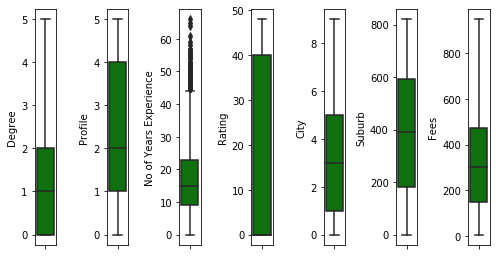

In [29]:
column_list = train_data_new.columns.values
ncol=7
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(0, len(column_list)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(train_data_new[column_list[i]],color='green',orient='v')
    plt.tight_layout()

Observation: We can see the presence of outliers in 'No of Years Experience' column.

# CHECKING SKEWNESS:

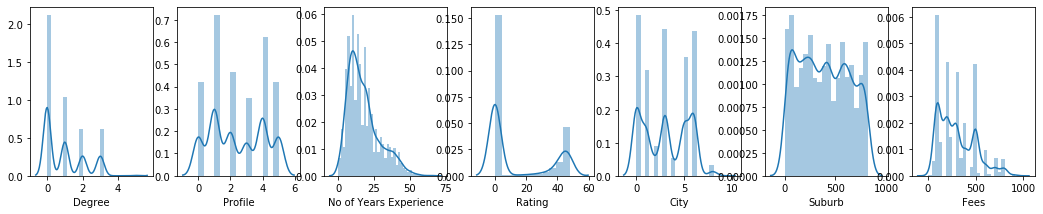

In [30]:
collist = train_data_new.columns.values
ncol = 7
nrows = 5


plt.figure(figsize=(18, 18))

for i in range(0, len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.distplot(train_data_new[collist[i]])

Observation: We can see presence of skewness in almost all columns.

# BIVARIATE ANALYSIS:

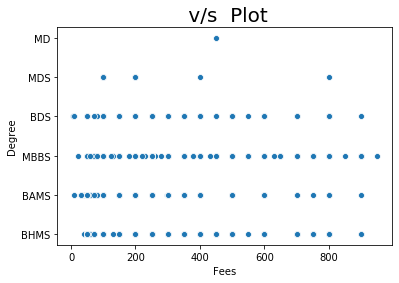

In [31]:
plt.title(' v/s  Plot', fontsize = 20)
sns.scatterplot(train_data['Fees'], train_1['Degree'])

Observation: we can see that doctors having MBBS have highest Fees, and doctor having MD degree have moderate fees.

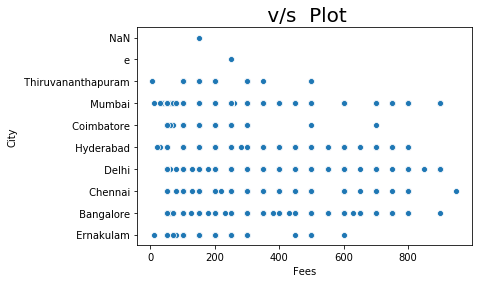

In [32]:
plt.title(' v/s  Plot', fontsize = 20)
sns.scatterplot(train_data['Fees'], train_1['City'])

Observation: We can see that doctor working megacities like Chennai, Mumbai, Delhi have highes Fees, whereas doctors working in city like Thiruvananthapuram, Coimbatore have less Fees. 

# CHECKING CORELATION MATRIX:

In [33]:
dfcor = train_data_new.corr()
dfcor

,Degree,Profile,No of Years Experience,Rating,City,Suburb,Fees
Degree,1.000000,0.015911,-0.257355,-0.144104,0.060784,-0.015501,-0.179939
Profile,0.015911,1.000000,0.190333,-0.106447,-0.022352,0.025563,0.150217
No of Years Experience,-0.257355,0.190333,1.000000,0.017252,0.026864,0.008130,0.004576
Rating,-0.144104,-0.106447,0.017252,1.000000,-0.102900,-0.044294,0.146261
City,0.060784,-0.022352,0.026864,-0.102900,1.000000,-0.072263,-0.048763
Suburb,-0.015501,0.025563,0.008130,-0.044294,-0.072263,1.000000,-0.053056
Fees,-0.179939,0.150217,0.004576,0.146261,-0.048763,-0.053056,1.000000


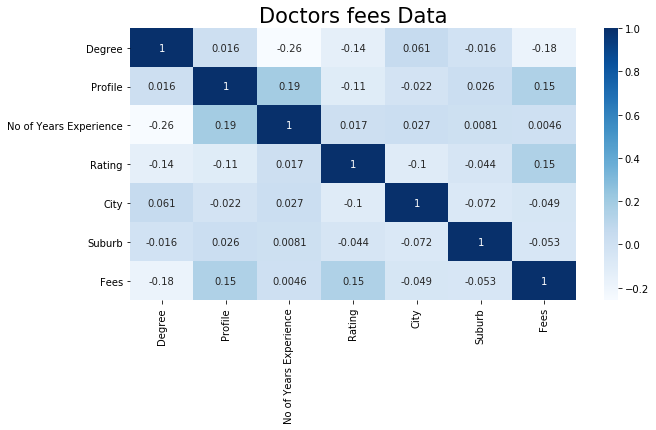

In [34]:
plt.figure(figsize=(10,5))
plt.title('Doctors fees Data', fontsize = 21)

sns.heatmap(dfcor,cmap='Blues', annot=True)

Observation: We can see that Doctors Rating is 0.15 values positively corelated with Fees.
    Years of experience is also 0.0046 values positively corelated with Fees.
    

# ANALYSING PAIRPLOT:

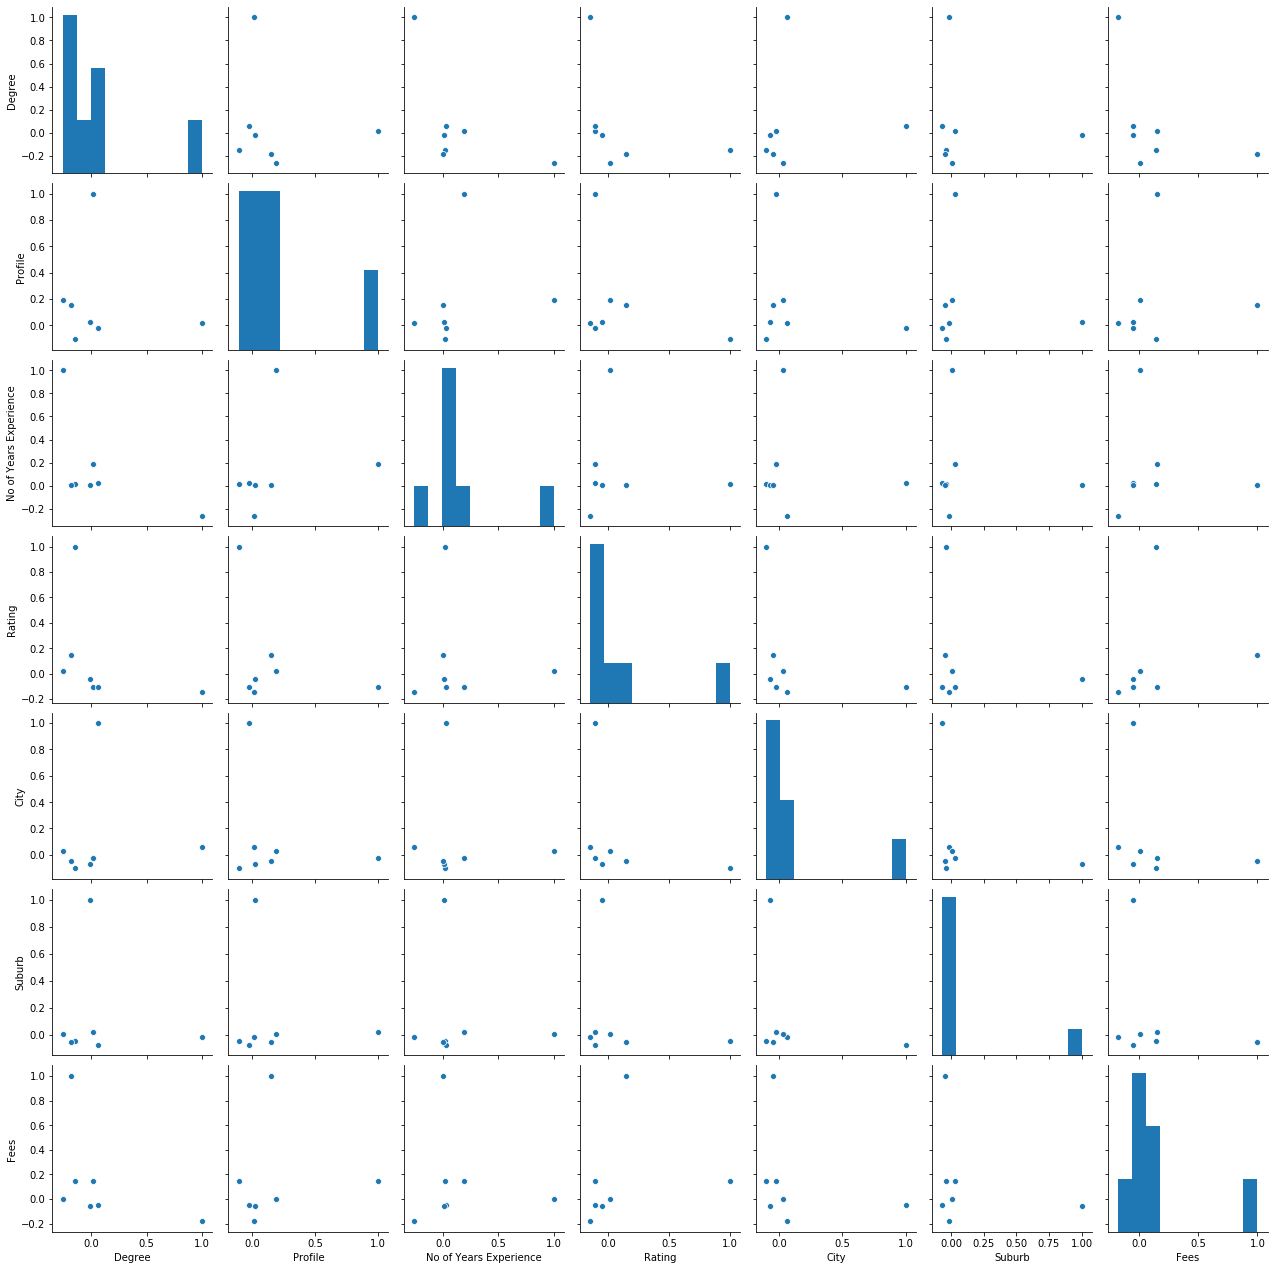

In [35]:
sns.pairplot(dfcor)

Observation: We can see that Doctors Rating, Years of experience column is positively corelated with Fees column.
    

# REMOVING OUTLIERS:

In [36]:
#Removing Outliers in traindataset:
z=np.abs(zscore(train_data_new))
z

array([[0.85872168, 0.3377282 , 0.77818638, ..., 1.30272274, 0.15935372,
        0.02053574],
       [0.85872168, 0.93323024, 0.32656591, ..., 0.85112235, 0.50867212,
        1.07851947],
       [0.85872168, 0.3377282 , 1.13948276, ..., 0.87195372, 1.41689996,
        2.09543172],
       ...,
       [3.67554984, 0.85327587, 0.86851048, ..., 1.28189137, 0.0689419 ,
        0.50845612],
       [3.67554984, 0.85327587, 1.13948276, ..., 1.28189137, 1.36531835,
        1.07851947],
       [3.67554984, 0.85327587, 0.86851048, ..., 0.87195372, 1.52559385,
        0.5495276 ]])

In [37]:
threshold = 3
print(np.where(z>threshold))

(array([  41,   74,  118,  129,  150,  366,  403,  410,  447,  528,  662,
        758,  813,  829,  848,  890,  911,  931,  937,  948, 1088, 1093,
       1131, 1314, 1434, 1439, 1485, 1631, 1638, 1672, 1744, 1765, 1804,
       1971, 1998, 2134, 2166, 2173, 2220, 2225, 2290, 2307, 2317, 2345,
       2376, 2442, 3432, 3538, 4126, 4179, 4654, 4670, 5074, 5075, 5076,
       5077, 5078, 5079, 5080, 5081, 5082, 5083, 5084, 5085, 5086],
      dtype=int64), array([2, 2, 6, 2, 2, 2, 6, 2, 2, 6, 6, 2, 2, 2, 2, 6, 2, 6, 2, 2, 6, 2,
       6, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 6, 2, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64))


In [38]:
#creating new dataset without outliers and skewness
train_d = train_data_new[(z<3).all(axis=1)]


In [39]:
print(((train_data_new.shape[0]-train_d.shape[0])/train_data_new.shape[0]*100))

1.2777668566935325


OBSERVATION: We can see that after removing outliers, we are having almost 1.27% of dataloss.

In [40]:
#Removing Outliers in test dataset:
z=np.abs(zscore(test_data_new))

In [41]:
threshold = 3
print(np.where(z>threshold))

(array([  49,  107,  414,  532,  550,  551,  567,  921, 1697, 1698, 1699,
       1700], dtype=int64), array([2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0], dtype=int64))


In [42]:
#creating new dataset without outliers and skewness
test_d = test_data_new[(z<3).all(axis=1)]

In [43]:
print(((test_data_new.shape[0]-test_d.shape[0])/test_data_new.shape[0]*100))

0.7054673721340388


OBSERVATION: We can see that after removing outliers, we are having almost 0.70% of dataloss.

# CREATING X, Y DATASET:

In [44]:
# creating dataframe for algorithm modeling.

x = train_d.iloc[:,0:6]
y = train_d.iloc[:,-1]

In [45]:
x.columns

Index(['Degree', 'Profile', 'No of Years Experience', 'Rating', 'City',
       'Suburb'],
      dtype='object')

In [46]:
test_d.columns

Index(['Degree', 'Profile', 'No of Years Experience', 'Rating', 'City',
       'Suburb'],
      dtype='object')

# SCALING THE DATASET:

In [47]:
sc = StandardScaler()
x= sc.fit_transform(x)
columnslist = ['Degree', 'Profile', 'No of Years Experience', 'Rating', 'City','Suburb']
X= pd.DataFrame(x, columns = columnslist)

In [48]:
sc = StandardScaler()
x= sc.fit_transform(test_d)
columnslist = ['Degree', 'Profile', 'No of Years Experience', 'Rating', 'City','Suburb']
test_d_scaled = pd.DataFrame(x, columns = columnslist)


# CREATING TRAIN TEST DATASET:

In [49]:
#creating train test dataset from the x and y part inoder to start model making.

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4017, 6)
(4017,)
(1005, 6)
(1005,)


# LINEAR REGRESSION METHOD:

In [50]:
# Linear Regression model making:
lm = LinearRegression()
lm.fit(x_train, y_train)

print('linearRegression Coeffient', lm.coef_)
print('linearRegression Intercept', lm.intercept_)
print('linearRegression score', lm.score(x_train, y_train))

# predicting x_test values
y_pred = lm.predict(x_test)
y_pred

linearRegression Coeffient [-33.58329583  33.72881565 -14.10990949  26.42340559  -4.92766563
  -9.56680779]
linearRegression Intercept 304.2664304231707
linearRegression score 0.08150898866017864


array([395.17458876, 324.57676403, 324.33033005, ..., 195.5896058 ,
       295.41894833, 400.69754367])

In [52]:
# calculating errors::


print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, y_pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, y_pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, y_pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  141.15427223093414
MEAN SQUARED ERROR:  29610.35387230411
ROOT MEAN SQUARED ERROR:  172.07659304014626


In [53]:
print('r2 Score of Linear Regression model: \n')
print(r2_score(y_test, y_pred))

r2 Score of Linear Regression model: 

0.09828479795331135


checking overfitting of model using cross validation score.

In [51]:
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(lm, X, y, cv=cv1).mean())

0.0815684983106407


# LASSO RIDGE METHOD:

In [54]:
ls = Lasso(alpha = 0.01)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)

0.08150896821667197

checking overfitting of model using cross validation score.

In [55]:
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(ls, X, y, cv=cv1).mean())

0.08099159284668139


In [56]:
rd = Ridge(alpha= 0.01)

rd.fit(x_train, y_train)
rd.score(x_train, y_train)

0.08150898865946532

checking overfitting of model using cross validation score.

In [57]:
print(cross_val_score(rd, X, y, cv=cv1).mean())

0.0797456609362894


# ELASTIC NET METHOD:

In [58]:
# elasticNet is a combination of both lasso and ridge algorithms

from sklearn.linear_model import ElasticNet
enr= ElasticNet(alpha= 0.01)

enr.fit(x_train, y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train, y_train))
enr.coef_

0.08150593061139033


array([-33.37864065,  33.5044058 , -13.93957038,  26.28964301,
        -4.92377767,  -9.51159693])

In [59]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, enrpred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, enrpred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, enrpred)))


ERRORS:
MEAN ABSOLUTE ERROR:  141.17637600601418
MEAN SQUARED ERROR:  29611.43380938346
ROOT MEAN SQUARED ERROR:  172.0797309661526


Checking over fitting of the model using cross validation score:

In [60]:
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(enr, X, y, cv=cv1).mean())

0.08049317646766427


# SUPPORT VECTOR REGRESSOR METHOD:

In [61]:
from sklearn.svm import SVR

kernellist = ['linear', 'poly', 'rbf']

for i in kernellist:
    sv = SVR(kernel = i)
    sv.fit(x_train, y_train)
    print('\nkernel : ' + i)
    print(sv.score(x_train, y_train))


kernel : linear
0.03560385302802527

kernel : poly
0.03245176708964537

kernel : rbf
0.05706024329909953


In [62]:
sv_rbf = SVR('rbf')
sv_rbf.fit(x_train, y_train)
print(sv_rbf.score(x_train, y_train))

0.05706024329909953


In [63]:
sv_rbf_pred_y = sv_rbf.predict(x_test)

In [64]:
# checking errors:

print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, sv_rbf_pred_y))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, sv_rbf_pred_y))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, sv_rbf_pred_y)))


ERRORS:
MEAN ABSOLUTE ERROR:  137.89918346827463
MEAN SQUARED ERROR:  30457.09489861405
ROOT MEAN SQUARED ERROR:  174.51961178794218


In [65]:
# checking r2 score error of support vector regressor linear model

print(r2_score(y_test, sv_rbf_pred_y))

0.07249924811108388


In [66]:
cv1 = KFold(n_splits=10, shuffle=True)


print(cross_val_score(sv_rbf, X, y, cv=cv1).mean())

0.060573055511327065


# DECISION TREE REGRESSOR METHOD:

In [67]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
preddtr = dtr.predict(x_test)

print(dtr.score(x_train, y_train))

0.9889308234282543


In [68]:
y_pred = dtr.predict(x_test)
y_pred

array([400., 500., 100., ..., 250., 100., 800.])

In [69]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, y_pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, y_pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, y_pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  159.94825870646767
MEAN SQUARED ERROR:  51411.39502487562
ROOT MEAN SQUARED ERROR:  226.74081023246703


In [70]:
from sklearn.model_selection import cross_val_score
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(dtr, X, y, cv=cv1).mean())

-0.4541366731208775


# RANDOM FOREST REGRESSOR METHOD:

In [71]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print(rf.score(x_train, y_train))

0.8720157533753732


In [73]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  128.5707140488036
MEAN SQUARED ERROR:  27579.97830550324
ROOT MEAN SQUARED ERROR:  166.07220810690524


Checking over fitting of the model using cross validation score:

In [72]:
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(rf, X, y, cv=cv1).mean())

0.1530294856240248


# ADA BOOST REGRESSOR METHOD:

In [74]:
adr = AdaBoostRegressor(n_estimators=100)
adr.fit(x_train, y_train)
pred=adr.predict(x_test)
print(adr.score(x_train, y_train))

0.13171928127341304


In [75]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  141.85828023591114
MEAN SQUARED ERROR:  28770.49033555556
ROOT MEAN SQUARED ERROR:  169.61866151917235


Checking over fitting of the model using cross validation score:

In [76]:
from sklearn.model_selection import KFold

cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(adr, X, y, cv= cv1).mean())

0.12119003919714788


# OBSERVATION:

By studying all the models and their cross validation score we found that LinearRegression model is our best fit model, it has least overfitting.

# SAVING MODEL:

In [77]:
import joblib
joblib.dump(lm, 'Vaibhav_doctors_consultation_fees_project_model.pkl')

['Vaibhav_doctors_consultation_fees_project_model.pkl']

# RELOADING MODEL:

In [78]:
#Reloading the model and predicting the dataset.
Vaibhav_doctors_consultation_fees_project_model = joblib.load('Vaibhav_doctors_consultation_fees_project_model.pkl')
Vaibhav_doctors_consultation_fees_project_model.predict(x_train)

array([341.30108702, 306.12981232, 265.39761986, ..., 257.78369291,
       212.17481481, 317.82318436])

# CONCLUSION:

CONCLUSION: Our model is having accuracy of 8.1% which is very less.

# THANK YOU